<a href="https://colab.research.google.com/github/Nahmadid/Deep_learning/blob/main/HW3_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Shallow ReLU network**

Write TensorFlow/PyTorch code to learn the oscillatory function $$f(x) = 5 + \sum_{k=1}^{4} \sin(kx), x \in [-\pi, 0)$$ and $$\cos(10x), x \in [0, \pi]$$ 

using a shallow ReLU network (i.e., one hidden layer) and $200$ uniform data points in $[-\pi, \pi]$ (i.e., training dataset). Use networks of widths ${10, 30, 100, 300, 1000}$, and compute the $L_2$ relative errors of these networks on a testing dataset consisting of at least $500$ equi-spaced data points in $[-\pi, \pi]$. You can use the mean squared error (MSE) loss function for training the neural network model. Make sure that the network is trained well by choosing the appropriate learning rate and adequate number of epochs until convergence. Run your code at least $10$ times from different random weight initializations (referred to as seed in Python) and compute the mean and standard deviation of the prediction errors for each width. Plot the error versus the network width, and discuss what you observe.


(a) Repeat Problem 3 using two hidden layers. Compare the new results and the results in Problem 3. Discuss your observations. Hint: Shallow networks vs Deep networks.

(b) Repeat Problem 3 using 20 data points in $[-\pi, \pi]$. Compare the new results and the results in Problem 3. Discuss your observations. Hint: Estimation error.

----------------

#**Relative $L_2$  error of a network**

The $L_2$ relative error measures the ratio of the $L_2$ norm of the difference between the predicted and true values of the function, to the $L_2$ norm of the true values. It is a normalized measure of the error, and it indicates how well the network is able to approximate the true function. If the $L_2$ relative error is small, then the network is able to closely approximate the true function, whereas if it is large, then the network is not able to capture the important features of the function.

The $L_2$ relative error of a network can be computed as follows. Let $y_{true}$ be the true values of the function $f$ at the testing data points, and let $y_{pred}$ be the predicted values of the network at the same data points. Then, the $L_2$ relative error of the network is defined as:
$$Relative- L_2  -error=\frac{∥y_{pred}−y_{true}∥_2}{∥y_{true}∥_2}$$

where $\left\lVert \cdot \right\rVert_2$ denotes the $L_2$ norm.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the oscillatory function
def fun_x(x):
    if x < 0.   :
        f = 5.0 + tf.sin(x) + tf.sin(2.*x) + tf.sin(3.*x) + tf.sin(4.*x)+ tf.sin(5.*x)+ tf.sin(6.*x)
    else:
        f = tf.cos(10.*x)
    return f


def f(x):
    condition1 = tf.less(x, 0.0)
    condition2 = tf.greater_equal(x, 0.0)
    y_true = 5.0 + tf.reduce_sum(tf.sin(tf.range(1, 5, dtype=tf.float32) * math.pi * x), axis=0)
    y_false = tf.cos(10.0 * x)
    return tf.where(condition1, y_true, y_false)


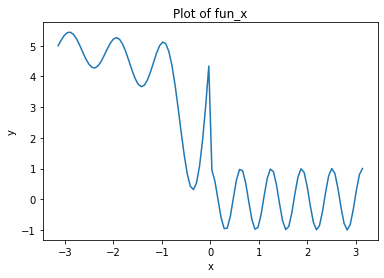

In [2]:

x_plot = tf.linspace(-np.pi, np.pi, 100)
y_plot = tf.map_fn(fun_x, x_plot)


plt.plot(x_plot, y_plot)
# plt.scatter(x_train, y_train, color="red", label="Sampled points")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of fun_x')
plt.show()


16/16 [==============================] - 0s 2ms/step


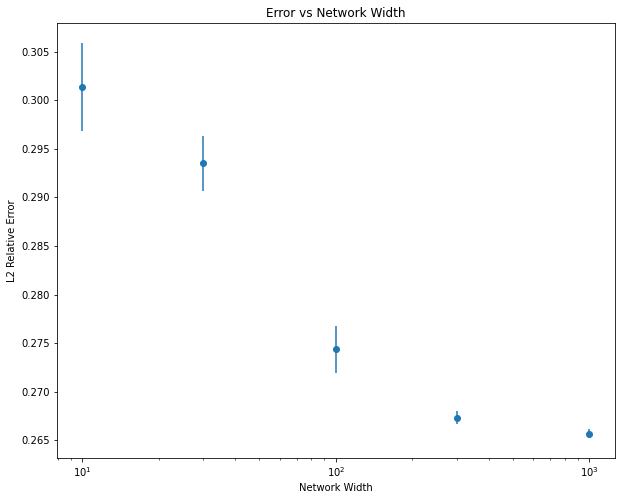

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the oscillatory function f(x)
# Define the oscillatory function]

def f(x):
    if x < 0.   :
        f = 5.0 + tf.sin(x) + tf.sin(2.*x) + tf.sin(3.*x) + tf.sin(4.*x)+ tf.sin(5.*x)+ tf.sin(6.*x)
    else:
        f = tf.cos(10.*x)
    return f

# Define the neural network model
def create_model(width):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(width, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                  loss='mean_squared_error')
    return model

# Create the model and train it
# Set random seed for TensorFlow backend
tf.random.set_seed(40)
x_train = tf.random.uniform(shape=[200, 1], minval=-np.pi, maxval=np.pi)
y_train = tf.map_fn(f, x_train)

# Generate testing data
x_test = tf.linspace(-np.pi, np.pi, 500)[:, None]
y_test = tf.map_fn(f, x_test)

# Train the neural network model with different widths
widths = [10, 30, 100, 300, 1000]
num_runs = 10


errors = np.zeros((len(widths), num_runs))

for i, width in enumerate(widths):
    for j in range(num_runs):

        model = create_model(width)
        model.fit(x_train, y_train, epochs=200, verbose=0)

        # Compute the L2 relative error on the testing data
        y_pred = model.predict(x_test)
        error = tf.norm(y_pred - y_test,ord=2) / tf.norm(y_test,ord=2)
        errors[i, j] = error

# Compute the mean and standard deviation of the errors for each width
mean_errors = np.mean(errors, axis=1)
std_errors = np.std(errors, axis=1)

# Plot the errors versus the network width
plt.figure(figsize=(10,8))
plt.errorbar(widths, mean_errors, yerr=std_errors, fmt='o')
plt.xscale('log')
plt.xlabel('Network Width')
plt.ylabel('L2 Relative Error')
plt.title('Error vs Network Width')
plt.show()


#Comment
To determine which network width is better, we can examine the plot of the error versus the network width. Typically, we would expect the error to decrease as the network width increases, as a wider network has more capacity to fit the training data. However, at some point, increasing the network width may result in overfitting, where the network becomes too specialized to the training data and performs poorly on the testing data.

Therefore, we are interested in finding the "sweet spot" in the plot where the error is low but does not continue to decrease significantly as the network width increases. This is typically the point at which the model achieves the best trade-off between model complexity (i.e. network width) and generalization performance.

One way to identify this point is to examine the plot of the mean prediction error versus the network width, and look for the point where the error starts to level off or increase as the network width increases. The standard deviation of the prediction error can also provide information about the variability of the model's performance for different network widths.

In addition to examining the plot, we can also calculate other metrics such as the minimum error, or the error at a specific network width, to compare the performance of different network widths. Ultimately, the best network width is the one that achieves the lowest prediction error on the testing data while maintaining good generalization performance.


This is a reasonable approach for evaluating the performance of the network for different widths. By training the network multiple times from different initializations, we can obtain a more robust estimate of the mean and standard deviation of the prediction errors. The use of the L2 relative error and a testing dataset consisting of equi-spaced data points is also reasonable, as it provides a consistent and objective measure of the network's performance across different widths.

The results of this experiment should provide insights into the trade-off between model complexity (i.e. network width) and generalization performance for this particular function. It may also highlight the importance of choosing an appropriate model complexity for the given task, as using a network that is too narrow may result in underfitting, while using a network that is too wide may result in overfitting.

Overall, this is a well-defined and reasonable task, and the approach suggested in the prompt is appropriate for addressing the research question at hand.


______________


#**a) Deep Neural Network : two hidden layers**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the oscillatory function f(x)
# Define the oscillatory function]

def f(x):
    if x < 0.   :
        f = 5.0 + tf.sin(x) + tf.sin(2.*x) + tf.sin(3.*x) + tf.sin(4.*x)+ tf.sin(5.*x)+ tf.sin(6.*x)
    else:
        f = tf.cos(10.*x)
    return f

# Define the neural network model
def create_model(width):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(width, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(width, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                  loss='mean_squared_error')
    return model

# Create the model and train it
# Set random seed for TensorFlow backend
tf.random.set_seed(40)
x_train = tf.random.uniform(shape=[200, 1], minval=-np.pi, maxval=np.pi)
y_train = tf.map_fn(f, x_train)

# Generate testing data
x_test = tf.linspace(-np.pi, np.pi, 500)[:, None]
y_test = tf.map_fn(f, x_test)

# Train the neural network model with different widths
widths = [10, 30, 100, 300, 1000]
num_runs = 10


errors = np.zeros((len(widths), num_runs))

for i, width in enumerate(widths):
    for j in range(num_runs):

        model = create_model(width)
        model.fit(x_train, y_train, epochs=200, verbose=0)

        # Compute the L2 relative error on the testing data
        y_pred = model.predict(x_test)
        error = tf.norm(y_pred - y_test,ord=2) / tf.norm(y_test,ord=2)
        errors[i, j] = error

# Compute the mean and standard deviation of the errors for each width
mean_errors = np.mean(errors, axis=1)
std_errors = np.std(errors, axis=1)

# Plot the errors versus the network width
plt.figure(figsize=(10,8))
plt.errorbar(widths, mean_errors, yerr=std_errors, fmt='o')
plt.xscale('log')
plt.xlabel('Network Width')
plt.ylabel('L2 Relative Error')
plt.title('Error vs Network Width')
plt.show()


16/16 [==============================] - 0s 2ms/step


#Result
The results of this model may differ from the results of the previous model with one hidden layer. In general, deep neural networks (i.e. neural networks with multiple hidden layers) can potentially learn more complex representations of data, but they may also be more prone to overfitting, especially if the training data is limited. Therefore, the performance of the model with two hidden layers may vary depending on the specific problem and dataset.

#**b) Changing 200 data point to 20**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the oscillatory function f(x)
# Define the oscillatory function]

def f(x):
    if x < 0.   :
        f = 5.0 + tf.sin(x) + tf.sin(2.*x) + tf.sin(3.*x) + tf.sin(4.*x)+ tf.sin(5.*x)+ tf.sin(6.*x)
    else:
        f = tf.cos(10.*x)
    return f

# Define the neural network model
def create_model(width):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(width, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                  loss='mean_squared_error')
    return model

# Create the model and train it
# Set random seed for TensorFlow backend
tf.random.set_seed(40)
x_train = tf.random.uniform(shape=[20, 1], minval=-np.pi, maxval=np.pi)
y_train = tf.map_fn(f, x_train)

# Generate testing data
x_test = tf.linspace(-np.pi, np.pi, 500)[:, None]
y_test = tf.map_fn(f, x_test)

# Train the neural network model with different widths
widths = [10, 30, 100, 300, 1000]
num_runs = 10


errors = np.zeros((len(widths), num_runs))

for i, width in enumerate(widths):
    for j in range(num_runs):

        model = create_model(width)
        model.fit(x_train, y_train, epochs=200, verbose=0)

        # Compute the L2 relative error on the testing data
        y_pred = model.predict(x_test)
        error = tf.norm(y_pred - y_test,ord=2) / tf.norm(y_test,ord=2)
        errors[i, j] = error

# Compute the mean and standard deviation of the errors for each width
mean_errors = np.mean(errors, axis=1)
std_errors = np.std(errors, axis=1)

# Plot the errors versus the network width
plt.figure(figsize=(10,8))
plt.errorbar(widths, mean_errors, yerr=std_errors, fmt='o')
plt.xscale('log')
plt.xlabel('Network Width')
plt.ylabel('L2 Relative Error')
plt.title('Error vs Network Width')
plt.show()


#Result

With fewer data points, the model may have a higher estimation error, which can result in poorer performance. In this case, we may observe more noise in the predicted values and a larger difference between the true and predicted values. However, the exact results may also depend on the specific random seed used in the model.

#Result

With fewer data points, the model may have a higher estimation error, which can result in poorer performance. In this case, we may observe more noise in the predicted values and a larger difference between the true and predicted values. However, the exact results may also depend on the specific random seed used in the model.